# Exploratory Data Analysis: Haberman's Dataset

#### ***Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.***

***Import Packages***

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

***Load in dataset and call it haberman_data***

ensure you pass in the parameter header

In [229]:
df = pd.read_csv('datasets_474_966_haberman.csv')

In [230]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***Check out head of data***

In [231]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

In [232]:
df = pd.read_csv('datasets_474_966_haberman.csv',names=['age','op_yr','ax','status'])

In [233]:
df.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***shape of the dataset***

In [234]:
df.shape

(306, 4)

***Check out the status column and see how it is classified***

In [235]:
data = df.status.value_counts()
data

1    225
2     81
Name: status, dtype: int64

***Replace the status values***

1 == Survived

2 == Not_survived

In [236]:
df.status = np.where(df.status==1,'Survived','Not_Survived')
df.head()

,age,op_yr,ax,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


***Print out the percentage of data classified***

In [237]:
perc = data.apply(lambda x:100*x/data.sum())
print(f'The percentage of patient that survived after 5 years of surgery {perc[1]:.2f}%')
print(f'The percentage of patient that died within 5 years of surgery {perc[2]:.2f}%')

The percentage of patient that survived after 5 years of surgery 73.53%
The percentage of patient that died within 5 years of surgery 26.47%


***Observation:***
input your observation below

***Check the description of the data***

In [238]:
df.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


***Observation:*** input your observation below

* 
* 
* 

# Univariate Analysis :

### Histogram

***Reproduce the following Figures***

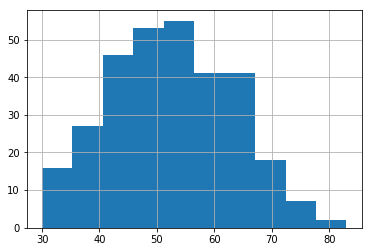

In [239]:
x = df.age
x.hist(bins=10)
plt.show()

***Hint: Use seaborn FacetGrid***

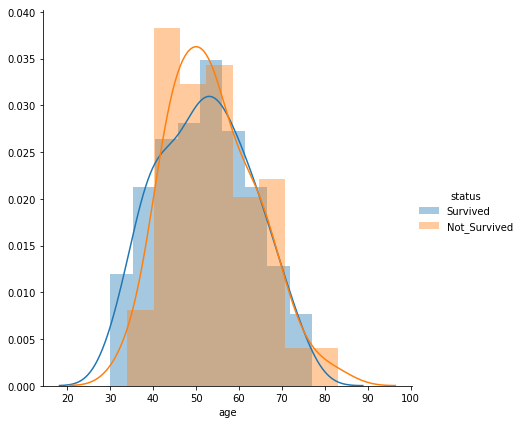

In [240]:
sns.FacetGrid(data=df,hue='status',height=6).map(sns.distplot,'age').add_legend()

***Observation:*** input your observation below

* 
* 

***Reproduce this figures***

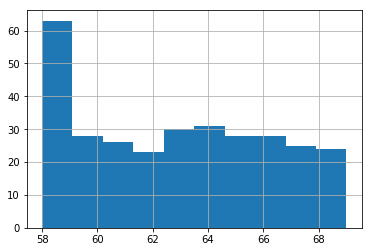

In [241]:
x = df.op_yr
x.hist(bins=10)
plt.show()

***Hint: Use seaborn FacetGrid***

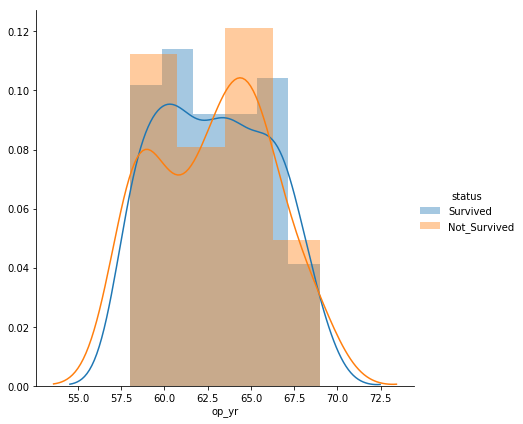

In [242]:
sns.FacetGrid(data=df,hue='status',height=6).map(sns.distplot,'op_yr').add_legend()

***Observation:*** input your observation below

* 
* 
* 

***Reproduce the following figures***

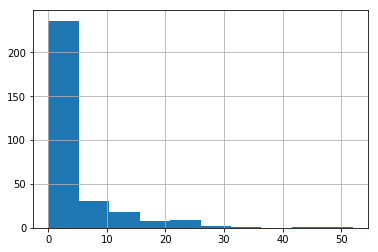

In [243]:
x = df.ax
x.hist(bins=10)
plt.show()

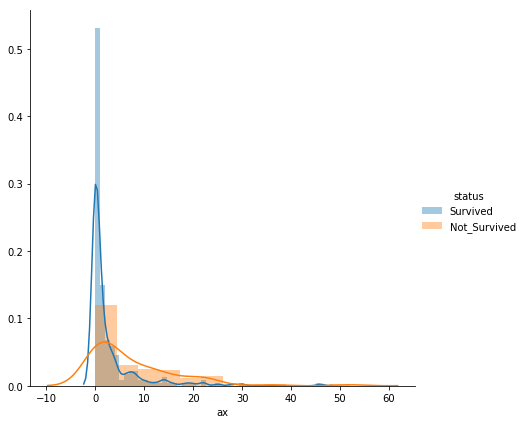

In [244]:
sns.FacetGrid(data=df,hue='status',height=6).map(sns.distplot,'ax').add_legend()

***Observation:*** input your observation below

* 
* 

# Probability Density Function & Commulative Density Function

## Read Through

***Segregate the data based on the Class Label i.e. Survival Status***

In [245]:
haberman_data_Survived=df.loc[df["status"]=="Survived"]
haberman_data_Not_Survived=df.loc[df["status"]=="Not_Survived"]

***Plotting the PDF,CDF for Age of Patient for the above Segregated Data***

In [246]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [247]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [248]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [249]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

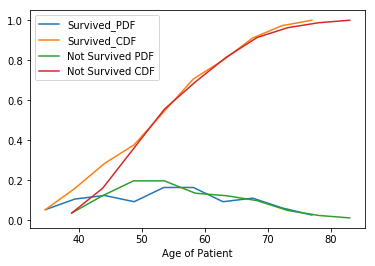

In [250]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances are high for the patients having age less than 40 years.

### To Do 👇

***Plotting the PDF,CDF for Year of Operation for the above Segregated Data***

In [251]:
density_year_survived,bin_edges_year_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_year_survived=(density_year_survived)/(sum(density_year_survived))

In [252]:
density_Year_Not_Survived,bin_Edges_Year_Not_Survived=np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_Year_Not_Survived=(density_Year_Not_Survived)/(sum(density_Year_Not_Survived))

In [253]:
print("Bin Edges Survived : {}\n".format(bin_edges_year_survived))
print("PDF Survived : {}\n".format(pdf_year_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Year_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Year_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [254]:
cdf_Year_Not_Survived=np.cumsum(pdf_Year_Not_Survived)
cdf_year_survived=np.cumsum(pdf_year_survived)

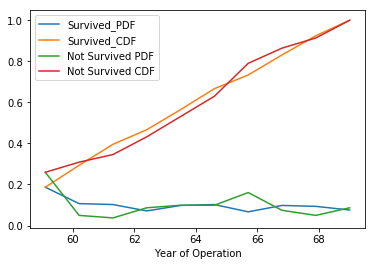

In [255]:
plt.plot(bin_edges_year_survived[1:],pdf_year_survived)
plt.plot(bin_edges_year_survived[1:],cdf_year_survived)
plt.plot(bin_Edges_Year_Not_Survived[1:],pdf_Year_Not_Survived)
plt.plot(bin_Edges_Year_Not_Survived[1:],cdf_Year_Not_Survived)
plt.xlabel('Year of Operation')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* 

***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

In [256]:
density_axil_survived,bin_edges_axil_survived=np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_axil_survived=(density_axil_survived)/(sum(density_axil_survived))

In [257]:
density_Axil_Not_Survived,bin_Edges_Axil_Not_Survived=np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_Axil_Not_Survived=(density_Axil_Not_Survived)/(sum(density_Axil_Not_Survived))

In [258]:
print("Bin Edges Survived : {}\n".format(bin_edges_axil_survived))
print("PDF Survived : {}\n".format(pdf_axil_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Axil_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Axil_Not_Survived))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [259]:
cdf_Axil_Not_Survived=np.cumsum(pdf_Axil_Not_Survived)
cdf_axil_survived=np.cumsum(pdf_axil_survived)

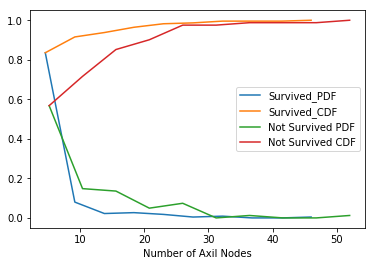

In [260]:
plt.plot(bin_edges_axil_survived[1:],pdf_axil_survived)
plt.plot(bin_edges_axil_survived[1:],cdf_axil_survived)
plt.plot(bin_Edges_Axil_Not_Survived[1:],pdf_Axil_Not_Survived)
plt.plot(bin_Edges_Axil_Not_Survived[1:],cdf_Axil_Not_Survived)
plt.xlabel('Number of Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* 
* 

## Box Plot

***Reproduce the following Images***

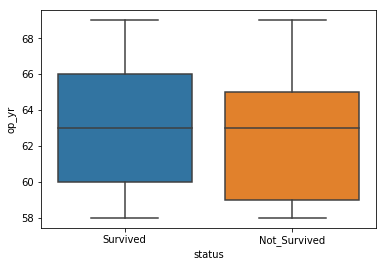

In [261]:
sns.boxplot(x='status',y='op_yr',data=df)

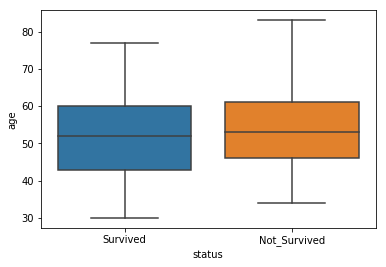

In [262]:
sns.boxplot(x='status',y='age',data=df)

***Observation :*** Input Your answer below

* 
* 
* 

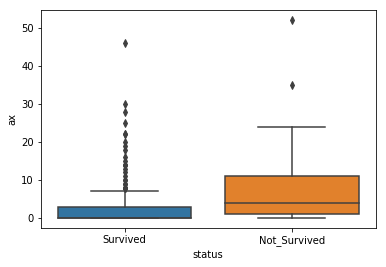

In [263]:
sns.boxplot(x='status',y='ax',data=df)

***Observation :*** Input Your answer below

* 
* 

## Violin Plots

***Reproduce the following images***

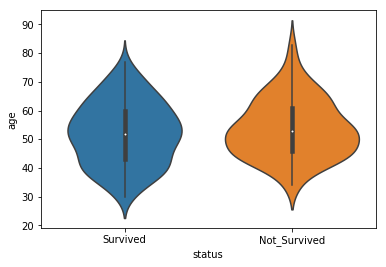

In [264]:
sns.violinplot(x="status", y="age", data=df)

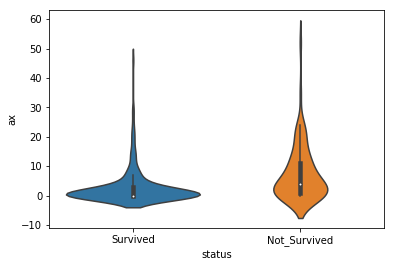

In [265]:
sns.violinplot(x="status", y="ax", data=df)

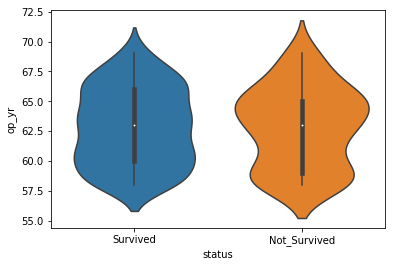

In [266]:
sns.violinplot(x="status", y="op_yr", data=df)

***Observation :*** Input your answer below

* 
* 

# Bivariate Analysis

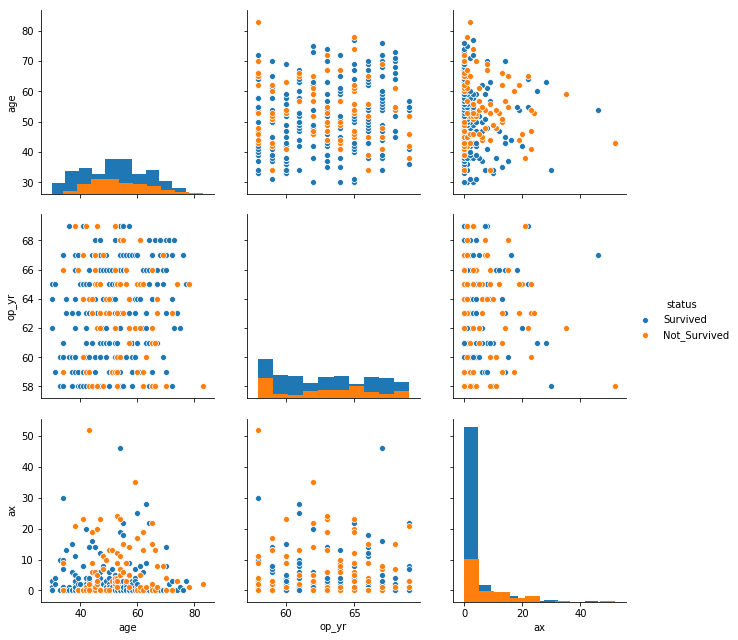

In [267]:
sns.pairplot(data=df,hue='status',height=3,diag_kind='hist')

***Hint: Use FacetGrid***

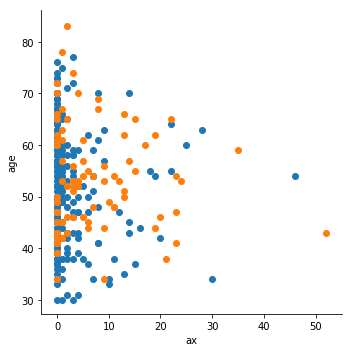

In [270]:
sns.FacetGrid(data=df,hue='status',height=5).map(plt.scatter,'ax','age')

***Observation :*** Input your answer below

* 
* 

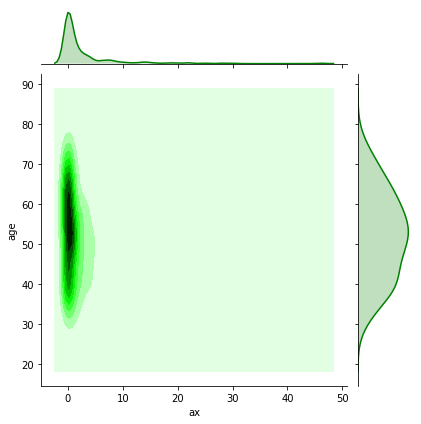

In [272]:
sns.jointplot(x='ax',y='age',data=haberman_data_Survived,kind='kde',color='green')

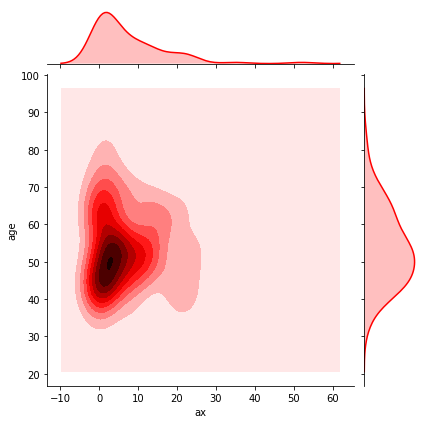

In [274]:
sns.jointplot(x='ax',y='age',data=haberman_data_Not_Survived,kind='kde',color='red')

***Observation :*** Input your answer below

* 
* 
* 

# Great Job!!!

***Final Conclusions :***

* Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
* Age of patients is in the range of 30 to 83.
* Operation's are performed during the period 1958-1969.
* The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
* Patients aged between 40 and 55 are more in number.
* Patients with age less than 40 years have more chances of survival.
* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
* Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
* Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.